In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/credit-risk-loan-eliginility/train_split.csv')
print('Shape of Dataframe:',df.shape)
df.info()

Shape of Dataframe: (63999, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   member_id                    63999 non-null  int64  
 1   loan_amnt                    63999 non-null  int64  
 2   funded_amnt                  63999 non-null  int64  
 3   funded_amnt_inv              63999 non-null  float64
 4   term                         63999 non-null  object 
 5   batch_enrolled               53735 non-null  object 
 6   int_rate                     63999 non-null  float64
 7   grade                        63999 non-null  object 
 8   sub_grade                    63999 non-null  object 
 9   emp_title                    60173 non-null  object 
 10  emp_length                   60675 non-null  object 
 11  home_ownership               63999 non-null  object 
 12  annual_inc                   63999 non-nul

<AxesSubplot:>

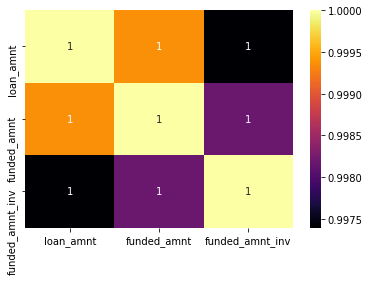

In [2]:
t = ['loan_amnt','funded_amnt','funded_amnt_inv']
sns.heatmap(df[t].corr(), cmap ="inferno", annot=True )

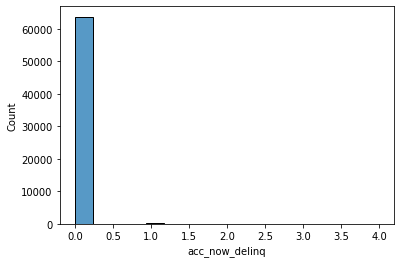

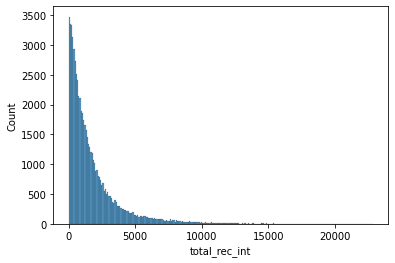

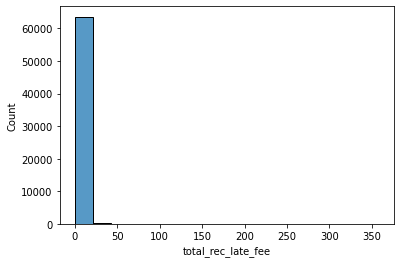

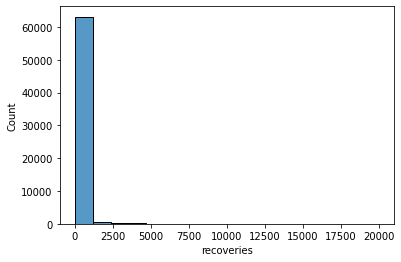

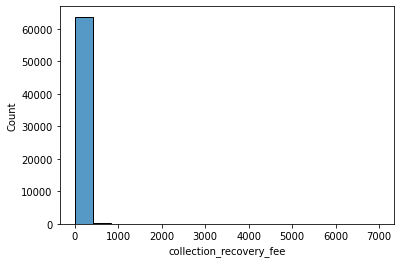

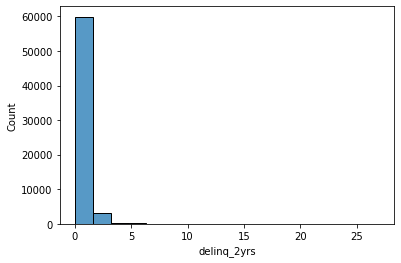

In [3]:
t2 = ['acc_now_delinq','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee', 'delinq_2yrs']
for i in t2:
    sns.histplot(df[i])
    plt.show()


In [4]:
#Removing insignificant and minimally affecting data and removing columns that have too many null values or too lobsided data 
df=df.drop(['funded_amnt','funded_amnt_inv','member_id','batch_enrolled','emp_title','sub_grade','zip_code'],axis=1)
df=df.drop(['recoveries','collection_recovery_fee','total_rec_int','total_rec_late_fee','tot_coll_amt','title', 'acc_now_delinq','delinq_2yrs', 
            'verification_status_joint','mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq','desc','tot_cur_bal',
            'total_rev_hi_lim'],axis=1)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   63999 non-null  int64  
 1   term                        63999 non-null  object 
 2   int_rate                    63999 non-null  float64
 3   grade                       63999 non-null  object 
 4   emp_length                  60675 non-null  object 
 5   home_ownership              63999 non-null  object 
 6   annual_inc                  63999 non-null  float64
 7   verification_status         63999 non-null  object 
 8   pymnt_plan                  63999 non-null  object 
 9   purpose                     63999 non-null  object 
 10  addr_state                  63999 non-null  object 
 11  dti                         63999 non-null  float64
 12  inq_last_6mths              63999 non-null  int64  
 13  open_acc                    639

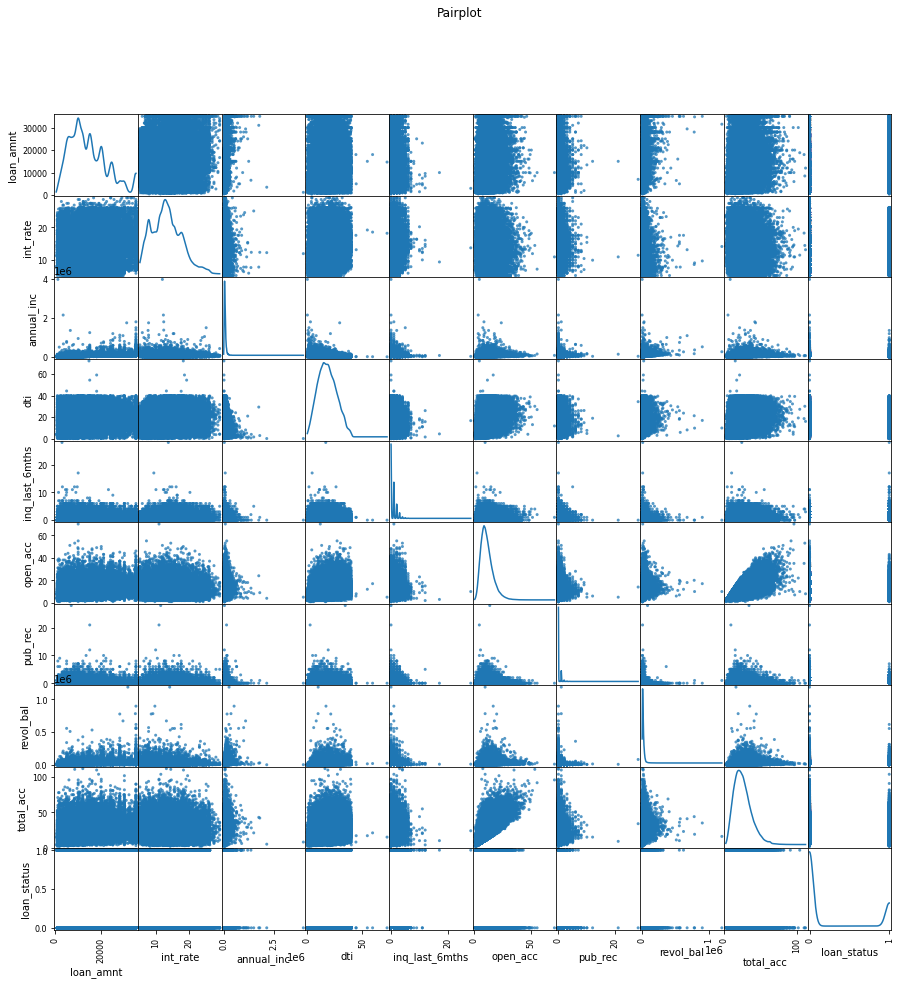

In [5]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    plt.suptitle('Pairplot')
    plt.show()
plotScatterMatrix(df, 15, 10)

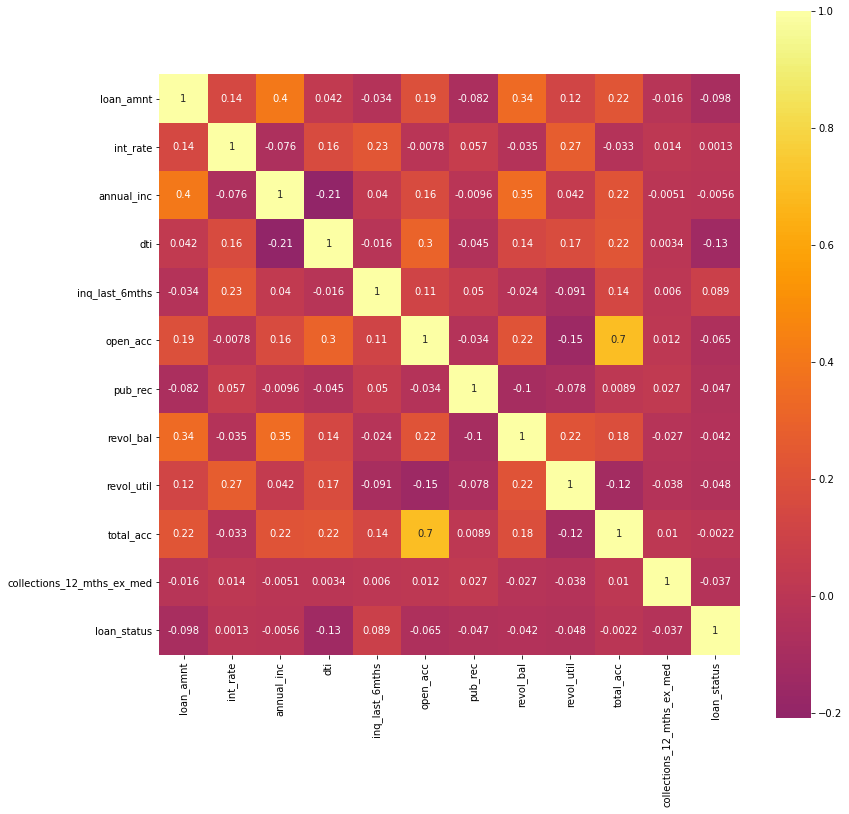

In [6]:
plt.figure(figsize=(13,13))
cor = df.corr(method = "pearson") 
sns.heatmap(cor, cmap ="inferno", center = 0, annot = True, square = True) 
plt.show()

In [7]:
df.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
initial_list_status            object
collections_12_mths_ex_med    float64
application_type               object
last_week_pay                  object
loan_status                     int64
dtype: object

In [8]:
#EMP length can be converted to int from object 
convert = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}

df = df.replace(convert)
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,last_week_pay,loan_status
0,14350,36 months,19.19,5,9.0,OWN,28700.0,Source Verified,n,debt_consolidation,...,14,1,22515,73.1,28,f,0.0,INDIVIDUAL,26th week,0
1,4800,36 months,10.99,2,0.0,MORTGAGE,65000.0,Source Verified,n,home_improvement,...,6,0,7624,23.2,13,w,0.0,INDIVIDUAL,9th week,0
2,10000,36 months,7.26,1,2.0,OWN,45000.0,Not Verified,n,debt_consolidation,...,5,0,10877,31.2,19,w,0.0,INDIVIDUAL,9th week,0
3,15000,36 months,19.72,4,10.0,RENT,105000.0,Not Verified,n,debt_consolidation,...,10,0,13712,55.5,21,f,0.0,INDIVIDUAL,135th week,0
4,16000,36 months,10.64,2,10.0,RENT,52000.0,Verified,n,credit_card,...,11,0,35835,76.2,27,w,0.0,INDIVIDUAL,96th week,0


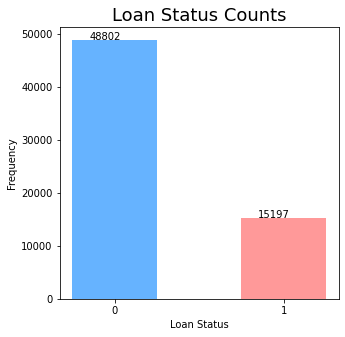

In [9]:
plt.figure(figsize=(5,5))
plt.title('Loan Status Counts', fontsize = 18)
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.bar(df['loan_status'].unique().tolist(), df['loan_status'].value_counts(), width = 0.5, color = ['#66b3ff','#ff9999'])
ax = plt.subplot()
ax.set_xticks(df['loan_status'].unique().tolist())
for i, v in enumerate(df['loan_status'].value_counts()):
    ax.text(i-.15, v, str(v), color='black')
plt.show()

In [10]:
df.drop(['pymnt_plan', 'addr_state'], axis =1, inplace = True)
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,last_week_pay,loan_status
0,14350,36 months,19.19,5,9.0,OWN,28700.0,Source Verified,debt_consolidation,33.88,...,14,1,22515,73.1,28,f,0.0,INDIVIDUAL,26th week,0
1,4800,36 months,10.99,2,0.0,MORTGAGE,65000.0,Source Verified,home_improvement,3.64,...,6,0,7624,23.2,13,w,0.0,INDIVIDUAL,9th week,0
2,10000,36 months,7.26,1,2.0,OWN,45000.0,Not Verified,debt_consolidation,18.42,...,5,0,10877,31.2,19,w,0.0,INDIVIDUAL,9th week,0
3,15000,36 months,19.72,4,10.0,RENT,105000.0,Not Verified,debt_consolidation,14.97,...,10,0,13712,55.5,21,f,0.0,INDIVIDUAL,135th week,0
4,16000,36 months,10.64,2,10.0,RENT,52000.0,Verified,credit_card,20.16,...,11,0,35835,76.2,27,w,0.0,INDIVIDUAL,96th week,0


In [11]:
df.to_csv("train_split.csv", index = False)
